## 퍼셉트론에서 신경망으로
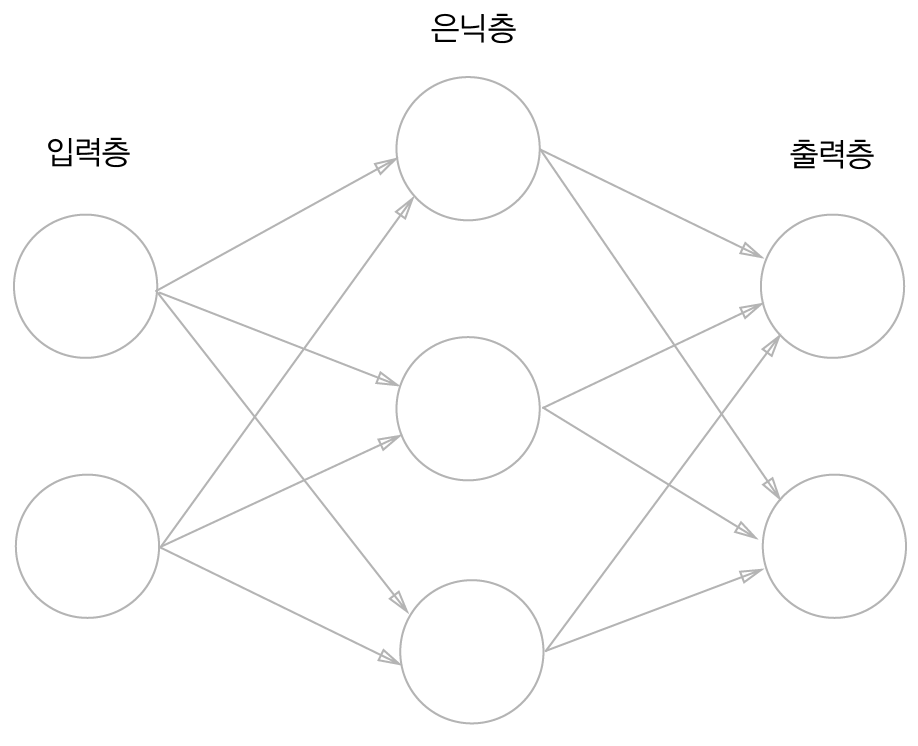

- 사람의 뇌와 비슷
- 적절한 가중치 값을 데이터로부터 자동으로 설정
- 학습 : 노드간의 가중치(weight)를 조정하는 것


- 입력층 : activate func가 없는 것
- 출력층
- 은닉층(hidden layer) : 1개 > 얕은 신경망, 2개 이상 > 깊은 신경망
    - 은닉층이 많아지면 가중치가 변화해야하는데 변화하지 않는다.??

## 바이어스를 고려한 퍼셉트론
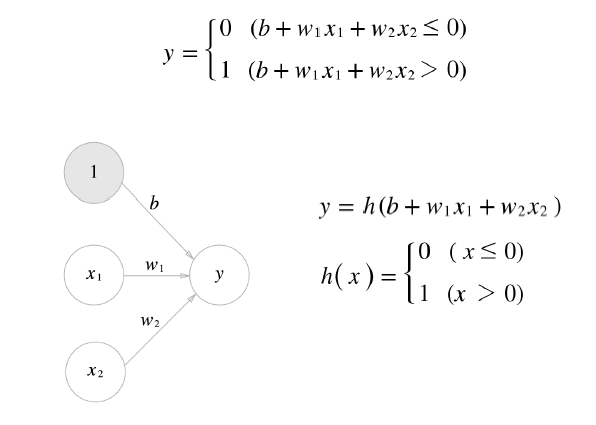


- b도 업데이트가 된다.
- y = h(x)

## 활성화 함수 등장

- 활성화 함수(activation function, h) : 입력 신호의 총 합(net)을 출력 신호로 변환하는 함수
    - 입력신호의 총합이 활성화 시키는지 안시키는지
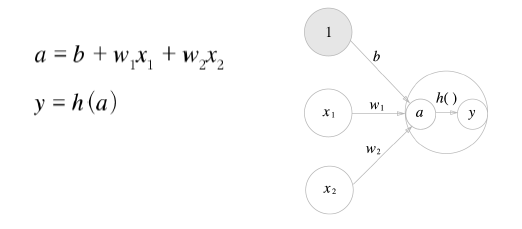

- 뉴런(노드) 표기법
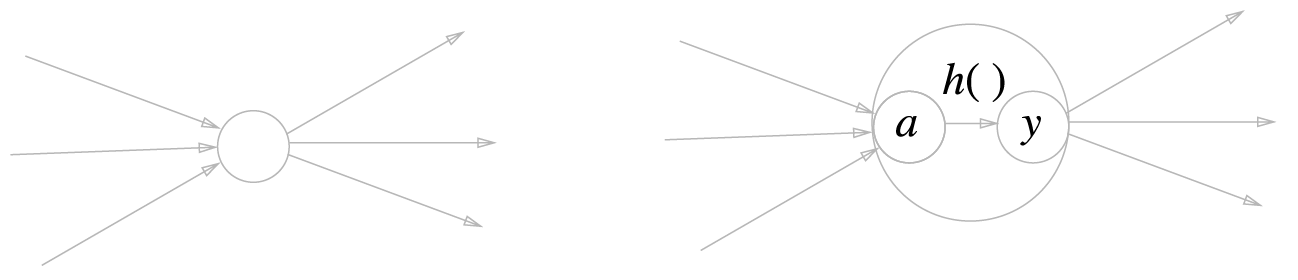


    - a : 모든 입력
    - y : h를 거친 a의 겂

#### 머신러닝 순서
1. Modeling
2. cost, loss 정의
    - MSE, Maximum Likelyhood Method
3. 학습, w 증가

## 활성화 함수

### 계단 함수(step function)
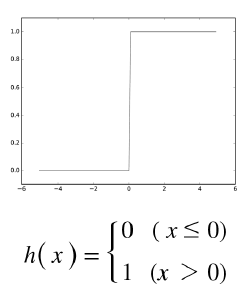


    - 실제 물리적으로 만들기 힘들다
    - 입력이 살짝만 변해도 출력이 쉽게 바뀐다. > 불안전하다

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
step_function(0.4)

1

In [4]:
step_function(np.array([1.0, 2.0]))
# 값이 여러개 입력되어서

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [6]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

In [7]:
x = np.array([1.0, 2.0])
x > 0

array([ True,  True], dtype=bool)

In [8]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

(-0.1, 1.1)

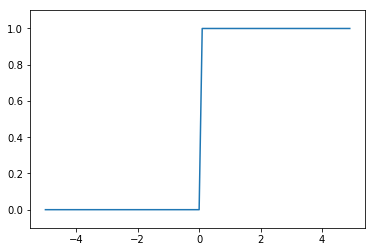

In [10]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

(-0.1, 1.1)

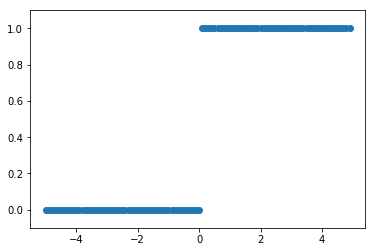

In [11]:
plt.scatter(x, y)
plt.ylim(-0.1, 1.1)

### 시그모이드 함수(sigmoid function)
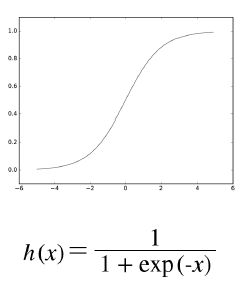


    - x = 0 > 1/2
    - x = +무한대 : 1
    - x = -무한대 : 0에 가까워진다

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

(-0.1, 1.1)

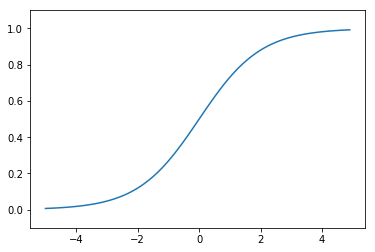

In [14]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

(-0.1, 1.1)

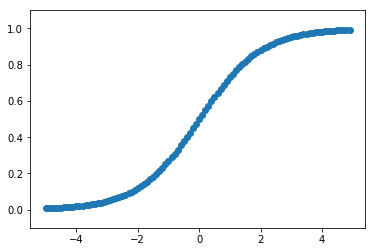

In [15]:
plt.scatter(x, y)
plt.ylim(-0.1, 1.1)

#### 시그모이드 함수와 계단 함수 비교

- 차이점 : 모양, 출력값
- 공통점 : 작은 입력(0), 큰 입력(1), 출력값 범위, 비선형

### 비선형 함수

- 신경망에서 활성화 함수는 비선형 함수이어야 함 : 다층 신경망에서는 필수
- 이유
    - 활성화 함수가 선형이라면 즉 \begin{align} h(x) & = cx \end{align}
    - 3계층 신경망의 출럭, y
    \begin{align} y = h(h(h(x))) = c(c(cx)) = c^3x = ax \end{align}
    - 3계층 신경망을 1계층 신경망, 즉 은닉층이 없는 신경망으로 표현 가능
    - 은닉층을 사용하는 이점이 사라짐

### ReLU 함수(Rectified Linear Unit function)
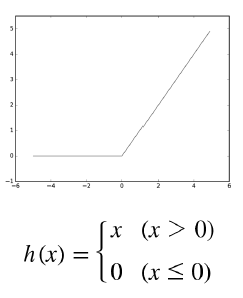


    - x > 0 : 입력받은 값 그대로? 출력으로 내보내겠다
    - Rectified : 정류된

In [16]:
def relu(x):
    return np.maximum(0, x)

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

(-0.1, 5.5)

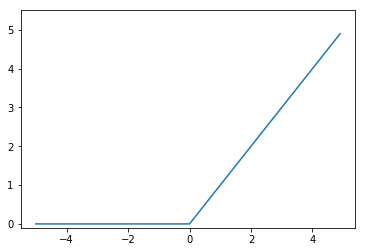

In [18]:
plt.plot(x, y)
plt.ylim(-0.1, 5.5)

### 항등 함수(identity function)
    - 입력 받은 것 그대로 내보낸다
    - 음의 값이면 음의 값 그대로

In [19]:
def identity_function(x):
    return x

## 행렬의 내적(행렬의 곱
- np.dot(A, B)
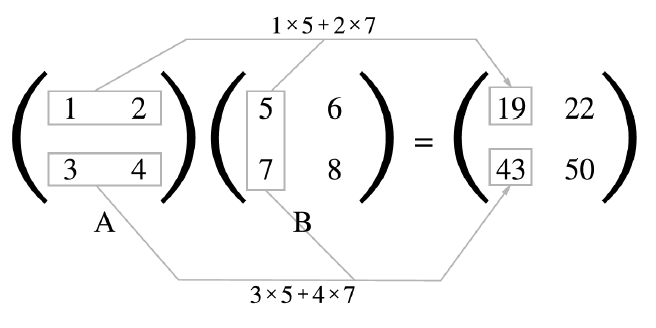

## 신경망의 내적
- 신경망의 출력을 행렬 연산으로
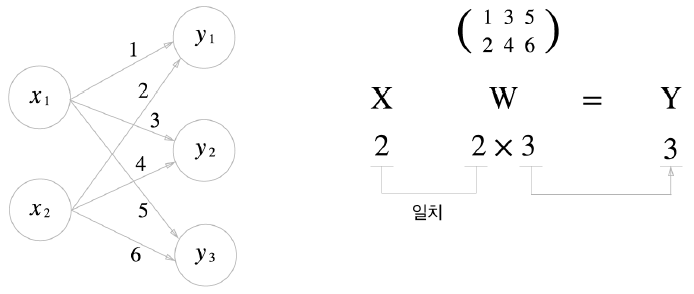


\begin{align}
y_1 = h(x) = h(1 \times x_1 + 2 \times x_2)\\
y_2 = h(x) = h(3 \times x_1 + 4 \times x_2)\\
y_3 = h(x) = h(5 \times x_1 + 6 \times x_2)\\
\end{align}

## 3층 신경망
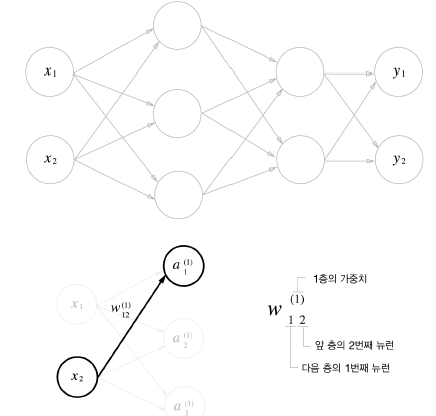

- w_1 2 : 1번째 입력값의 2번쨰 출력값

## 각 층의 신호 전달 구현(신경망의 순방향)
- 입력층에서 1층의 첫 번째 뉴련으로 가는 신호
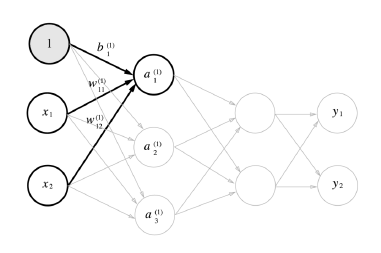

\begin{align}
a^{(1)}_{1} = w^{(1)}_{11}x_1 + w^{(1)}_{12} + b^{(1)}_1 \\
a^{(1)}_{2} = w^{(1)}_{21}x_1 + w^{(1)}_{22} + b^{(1)}_2 \\
A^{(1)} = XW^{(1)} + B^{(1)} \\
X = [x_1][x_2]\\
W_1 = [w_{11}][w_{21}][w_{31}]\\
[w_{12}][w_{22}][w_{32}]\\
\end{align}

## 각 층의 신호 전달 구현

In [20]:
import numpy as np

### 입력층에서 1층으로의 신호 전달
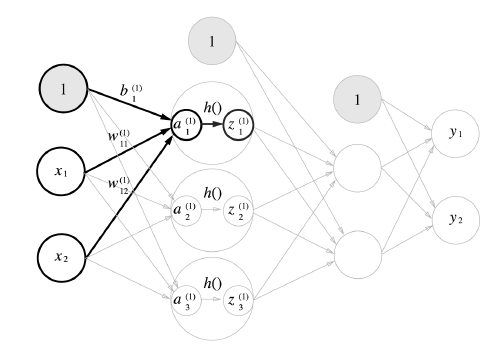


- h(x)는 시그모이드 함수
- activate func는 같은 종류로 사용

In [21]:
# 입력값
X = np.array([1.0, 0.5])

# 가중치
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])

# 바이어스
B1 = np.array([0.1, 0.2, 0.3])

In [22]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [23]:
A1 = np.dot(X, W1) + B1
print(A1)
type(A1)

[ 0.3  0.7  1.1]


numpy.ndarray

In [24]:
# 1계층에서 나오는 모든 출력 값
Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


### 1층에서 2층으로의 신호 전달
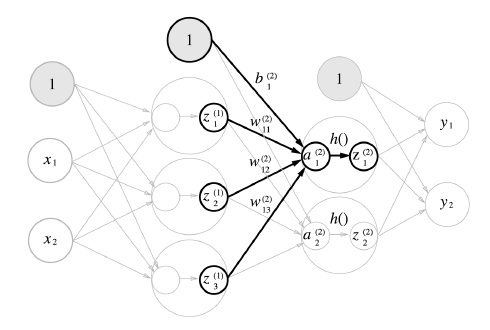

In [25]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [26]:
A2 = np.dot(Z1, W2) + B2
print(A2)

[ 0.51615984  1.21402696]


In [27]:
Z2 = sigmoid(A2)
print(Z2)

[ 0.62624937  0.7710107 ]


### 2층에서 출력층으로의 신호 전달
- 출력증의 활성화 함수로 항등 함수 사용
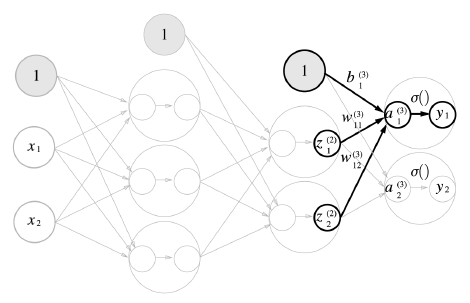

In [28]:
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [29]:
A3 = np.dot(Z2, W3) + B3
print(A3)

[ 0.31682708  0.69627909]


In [30]:
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### 신경망 순방향 전달(순전파)
- 구현 정리

In [31]:
# 망초기화
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    
    network['W2'] = np.array([[0.1, 0.4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    
    network['W3'] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    
    return network

In [32]:
def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B2']
    
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    
    A3 = np.dot(Z2, W3) + B3
    Y = identity_function(A3)
    
    return Y

In [33]:
network = init_networt()
print(network)

X = np.array([1.0, 0.5]) 
Y = forword(network, X)

NameError: name 'init_networt' is not defined

In [34]:
print(Y)

[ 0.31682708  0.69627909]


## 출력층 설계하기
- 신경망 출력층의 활성화 함수
    - 회귀 문제 : 항등 함수
    - 분류 문제
        - 2 클래스 분류 : 시그모이드 함수
        - 다증 클래스 분류 : 소프트맥스 함수

### 항등 함수(identity function)
- 입력을 그대로 출력
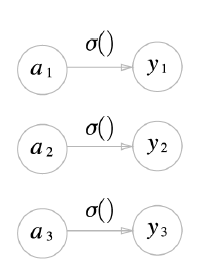

### 소프트맥스(softmax) 함수
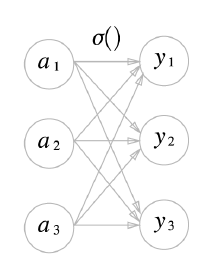
\begin{align}
    y_{k} = \frac{{exp}(a_{k})}{\sum_{i = 1}^{n}{exp}(a_{i})}\\
\end{align}

In [35]:
a = np.array([0.3, 2.9, 4.0, 1000.0])
exp_a = np.exp(a)
print(a)
print(exp_a)

[  3.00000000e-01   2.90000000e+00   4.00000000e+00   1.00000000e+03]
[  1.34985881  18.17414537  54.59815003          inf]


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [36]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

inf


In [37]:
y = exp_a / sum_exp_a
print(y)

[  0.   0.   0.  nan]


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [38]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

#### 소프트맥스 함수 구현 시 주의점
- 오버플로우(overflow) 문제 : 지수 값이 쉽게 커지기 때문
- 소프트맥스 함수 걔선 :
\begin{align}
y_{k} = \frac{{exp}(a_{k})}{\sum_{i = 1}^{n}{exp}(a_{i})}
= \frac{C{exp}(a_{k})}{C\sum_{i = 1}^{n}{exp}(a_{i})} \\
= \frac{{exp}(a_{k} + {log}C)}{C\sum_{i = 1}^{n}{exp}(a_{i}+ {log}C))} \\
= \frac{{exp}(a_{k} + {log}C')}{C\sum_{i = 1}^{n}{exp}(a_{i}+ {log}C'))}
\end{align}
- 지수 함수 계산 시 어떤 수를 더하거나 빼도 결과는 똑같음을 보여줌

#### 개선된 소프트맥스 함수
- C'에 어떤 값도 괜찮으나 오버플로우를 방지할 목적이라면
    - 입력 신호 중 최댓값으로 설정

In [39]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([ nan,  nan,  nan])

In [40]:
c = np.max(a)

In [41]:
a - c

array([  0, -10, -20])

In [42]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [43]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [44]:
a = np.array([1010, 1000, 990])

In [45]:
softmax(a)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

#### 소프트맥스 함수의 특징
- 출력값 범위 : [0, 1.0)
- 출력의 총합 : 1
- 출력을 확률로 해석할 수 있음
    - "2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다."
    - “74%의 확률로 2번째 클래스, 25%의 확률로 1번째 클래스, 1%의 확률로 0번째 클래스다”
    - 문제를 확률적(통계적)으로 대응할 수 있음
- 대소 관계가 변하지 않음
    - 신경망으로 분류 시 출력층의 소프트맥스 함수 생략 가능

In [46]:
aa = np.array([0.3, 2.9, 4.0])
yy = softmax(aa)
print(yy)
print(np.sum(yy))

[ 0.01821127  0.24519181  0.73659691]
1.0


### 출력층의 뉴런 수 정하기
- 문제에 맞게 적절히 설정 : ex) 숫자 이미지를 0부터 9중 하나로 분류
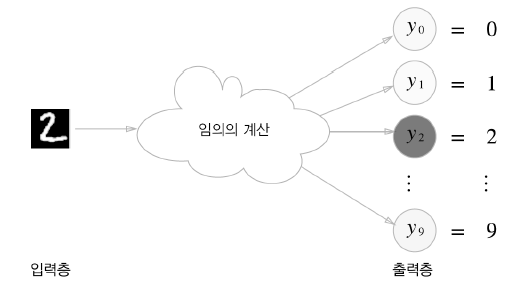

## 손글씨 숫자 인식
#### 이미 학습된 매개변수(신경망의 지식 표현) 사용
- 학습 과정 생략
- 추론 과정만 : 순전파(forward propagation)


#### MNIST 데이터셋
- http://yann.lecun.com/exdb/mnist/
- 0~9 숫자 이미지
- 훈련 이미지 : 60,000장 
- 시험 이미지 : 10,000장
- 크기: 28x28, 회색조(monochrome)
- 각 픽셀 값: 0~255
- 이미지가 실제 의미하는 숫자가 레이블로 붙어 있음


#### mnist.load_minst
- MNIST 데이터 > (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
- normalize : 입력 이미지 픽셀 값을 [0.0 ~ 1.0] 값으로 정규화 여부
- flatten : 입력 이미지를 1차원 배열로 변환 여부
- one_hot_label(원-핫 인코딩) : 정답에 해당하는 원소만 1, 나머지는 모두 0인 배열


#### mnist_show.py
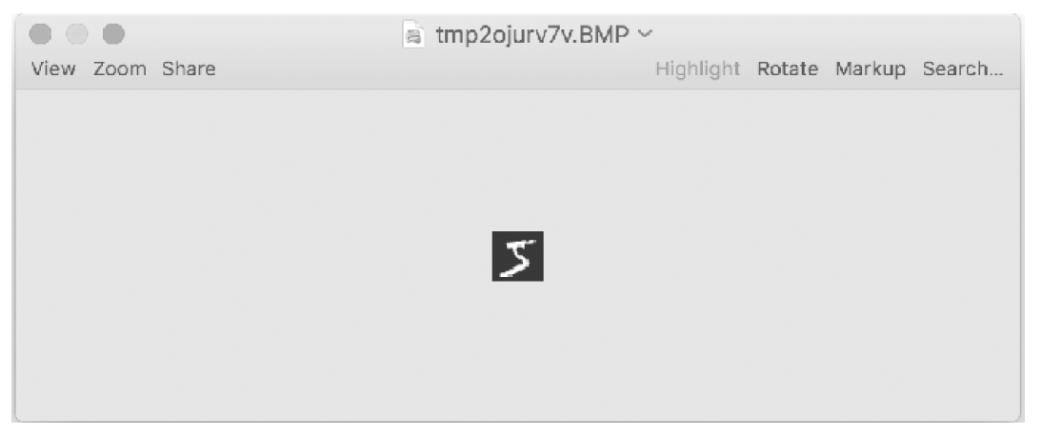


#### 손글씨 숫자 인식을 위한 신경망 설계
- 입력층 뉴런 : 784개(이미지크기 : 28 * 28 = 784)
- 출력층 뉴런 : 10개 (0 ~ 9 숫자 구분)
- 첫 번째 은닉층 뉴런 : 50개
- 두 번째 은닉층 뉴런 : 100개


#### nerualnet_mnist.py


#### sample_weight.pkl
- 학습된 가중치 매개변수 : weight, bias

#### 테스트 이미지를 입력해서 실제로 잘 판단하는지 확인

- conda list --full-name PIL
- conda search PIL
- conda install -n ml35 pillow

In [87]:
pwd

'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master\\CH03'

In [93]:
%cd CH03

C:\pydev\deep-learning-from-scratch-master\deep-learning-from-scratch-master\CH03


In [90]:
import numpy as np
import neuralnet_mnist
import mnist_show
from dataset.mnist import load_mnist

In [94]:
import importlib
importlib.reload(mnist_show)

5
(784,)
(28, 28)


<module 'mnist_show' from 'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master\\CH03\\mnist_show.py'>

In [95]:
# 테스트 이미지와 레이블 읽어들임
(_, _), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# normalize를 해서 그림이 보이질 않는다
#x_test, t_test = neuralnet_mnist.get_data()

In [96]:
x_test.shape

(10000, 784)

In [97]:
# 테스트할 이미지를 눈으로 확인
img = x_test[9999]
label = t_test[9999]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

mnist_show.img_show(img)

6
(784,)
(28, 28)


In [98]:
# 신경망 초기화
# 미리 학습해 두었던 가중치와 바이어스를 읽어들임
network = neuralnet_mnist.init_network()

In [99]:
# 테스트 이미지를 입력하여 신경망의 결과를 얻음
y = neuralnet_mnist.predict(network, x_test[9999])
print(y)

[  7.18617230e-05   6.99371014e-07   4.32665140e-04   3.58767721e-07
   1.75180682e-03   1.07496002e-04   9.97633696e-01   1.28286516e-07
   9.95843607e-07   3.49771739e-07]


C:\pydev\deep-learning-from-scratch-master\deep-learning-from-scratch-master\common\functions.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [100]:
# 신경망의 추론 결과
# 입력 이미지의 레이블과 비교해 봅시다.
p = np.argmax(y)
print(p)

6


### 정확도 평가

### 신경망 각 층의 배열 형상(shape)

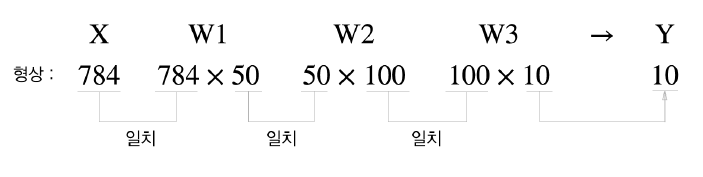

In [101]:
x, _ = neuralnet_mnist.get_data()

In [102]:
network = neuralnet_mnist.init_network()

In [103]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [104]:
x.shape

(10000, 784)

In [105]:
x[0].shape

(784,)

In [106]:
W1.shape

(784, 50)

In [107]:
W2.shape

(50, 100)

In [108]:
W3.shape

(100, 10)

### 배치 처리(batch processing)
- 이미지 여러 장을 입력하는 경우
- 100장
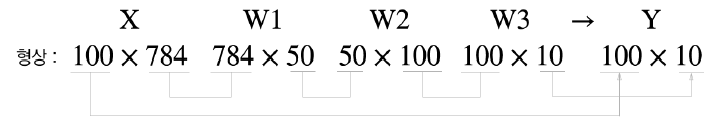


- 데이터를 효율적이고 빠르게 처리 가능
    - 수치 계산 라이브러리가 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화 되었기 때문
    - 배치 처리를 통해 I/O 횟수가 줄어들어 빠른 CPU 또는 GPU로 순수 계산하는 비율이 높아짐

In [109]:
list(range(0, 10000, 100))

[0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8500,
 8600,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900]

In [116]:
import neuralnet_mnist

In [115]:
import neuralnet_mnist_batch

Accuracy:0.9352


In [112]:
import importlib

In [113]:
importlib.reload(neuralnet_mnist)

Accuracy:0.9352


<module 'neuralnet_mnist' from 'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master\\CH03\\neuralnet_mnist.py'>

In [117]:
importlib.reload(neuralnet_mnist_batch)

Accuracy:0.9352


<module 'neuralnet_mnist_batch' from 'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master\\CH03\\neuralnet_mnist_batch.py'>